<a href="https://colab.research.google.com/github/khushbooyadav6591/Hello-World/blob/master/Advance_ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Purpose
The purpose of this assignment is to explore and extend your first Neural Network model.
Directions
In this assignment, you will accomplish the following:
1. Modify an existing neural network model to improve performance
2. Explain how different approaches affect the performance of the model
For the IMDB example that we discussed in class, do the following:
1. You used two hidden layers. Try using one or three hidden layers, and see how doing so
affects validation and test accuracy.
2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so
on.
3. Try using the mse loss function instead of binary_crossentropy.
4. Try using the tanh activation (an activation that was popular in the early days of neural
networks) instead of relu.
5. Use any technique we studied in class, and these include regularization, dropout, etc., to
get your model to perform better on validation.

In [2]:
import keras
keras.__version__
import pandas as pd
import matplotlib.pyplot as plt # plotting



In [3]:
from keras.datasets import imdb


In [4]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

1646592/1641221 [==============================] - 0s 0us/step


Model 1 : Original Model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6004 - accuracy: 0.7005 - val_loss: 0.3913 - val_accuracy: 0.8681
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3247 - accuracy: 0.9052 - val_loss: 0.3082 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2305 - accuracy: 0.92

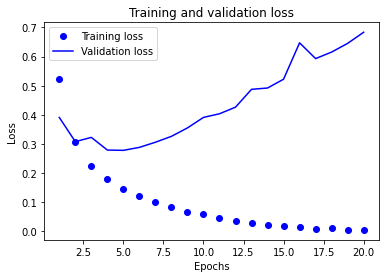

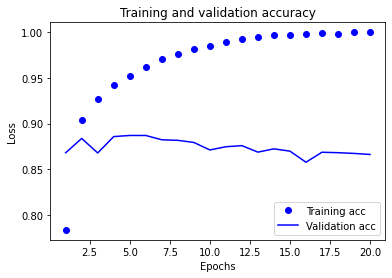

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.5299 - accuracy: 0.7638
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2686 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1978 - accuracy: 0.9303
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2915 - accuracy: 0.8845


array([[0.20425084],
       [0.99991465],
       [0.83947873],
       ...,
       [0.14093032],
       [0.06769601],
       [0.56065166]], dtype=float32)

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])







x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

model.predict(x_test)


We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.

model2 = 1 hidden layer,Rest same

model3 = 3 hidden layer,Rest same

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5815 - binary_accuracy: 0.7148 - val_loss: 0.4227 - val_binary_accuracy: 0.8317
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3405 - binary_accuracy: 0.8960 - val_loss: 0.3296 - val_binary_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2582 - binary_accuracy: 0.9220 - val_loss: 0.3005 - val_binary_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2040 - binary_accuracy: 0.9399 - val_loss: 0.2817 - val_binary_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1745 - binary_accuracy: 0.9483 - val_loss: 0.2779 - val_binary_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1477 - binary_accuracy: 0.9593 - val_loss: 0.2773 - val_binary_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - los

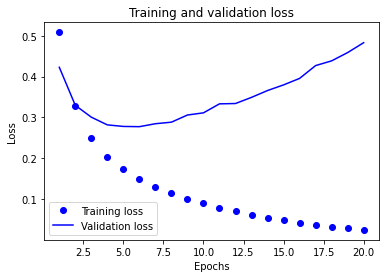

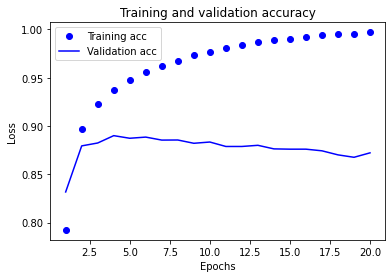

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5768 - accuracy: 0.7209
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.3097 - accuracy: 0.8991
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2152 - accuracy: 0.9301
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2900 - accuracy: 0.8860


array([[0.21825367],
       [0.9999838 ],
       [0.8955395 ],
       ...,
       [0.1537627 ],
       [0.12978917],
       [0.6533188 ]], dtype=float32)

In [ ]:

#model 2 : 1 hidden layer

from keras import models
from keras import layers

model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model2.add(layers.Dense(16, activation='relu'))# removed one hidden layer
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers

model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt

binary_accuracy = history.history['binary_accuracy']
val_binary_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(binary_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, binary_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_binary_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model2.evaluate(x_test, y_test)

results

model2.predict(x_test)


Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6323 - binary_accuracy: 0.6961 - val_loss: 0.4339 - val_binary_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3661 - binary_accuracy: 0.8910 - val_loss: 0.3375 - val_binary_accuracy: 0.8674
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2434 - binary_accuracy: 0.9223 - val_loss: 0.2843 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1806 - binary_accuracy: 0.9428 - val_loss: 0.2768 - val_binary_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1322 - binary_accuracy: 0.9575 - val_loss: 0.2901 - val_binary_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1021 - binary_accuracy: 0.9706 - val_loss: 0.3903 - val_binary_accuracy: 0.8673
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

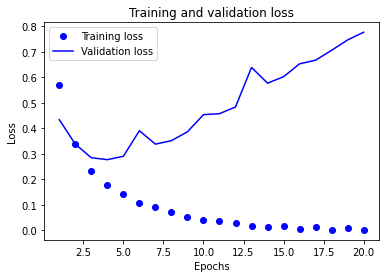

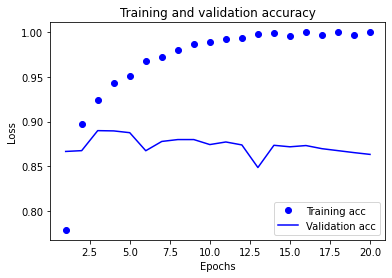

Epoch 1/4
49/49 [==============================] - 3s 36ms/step - loss: 0.5483 - accuracy: 0.7528
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2846 - accuracy: 0.9019
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2031 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2996 - accuracy: 0.8796


array([[0.27365634],
       [0.99980575],
       [0.96717584],
       ...,
       [0.12172541],
       [0.10231891],
       [0.7349816 ]], dtype=float32)

In [ ]:

#model 3 : 3 layer,rest same
from keras import models
from keras import layers

model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(16, activation='relu'))

model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers

model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt

binary_accuracy = history.history['binary_accuracy']
val_binary_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(binary_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, binary_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_binary_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=4, batch_size=512)
results = model3.evaluate(x_test, y_test)

results

model3.predict(x_test)


Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6215 - binary_accuracy: 0.6884 - val_loss: 0.4607 - val_binary_accuracy: 0.8482
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4012 - binary_accuracy: 0.8875 - val_loss: 0.3560 - val_binary_accuracy: 0.8781
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2922 - binary_accuracy: 0.9159 - val_loss: 0.3058 - val_binary_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2316 - binary_accuracy: 0.9276 - val_loss: 0.3005 - val_binary_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1935 - binary_accuracy: 0.9419 - val_loss: 0.2797 - val_binary_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1598 - binary_accuracy: 0.9516 - val_loss: 0.2804 - val_binary_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - los

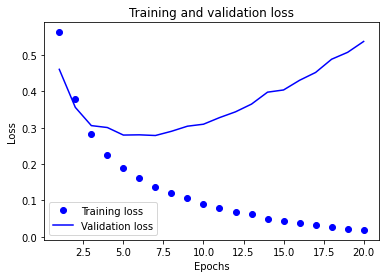

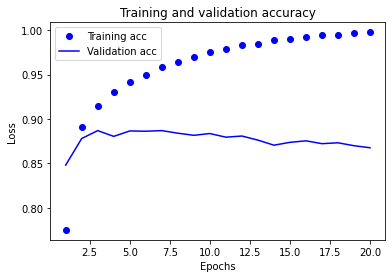

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.5609 - accuracy: 0.7307
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2832 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2043 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.8843


array([[0.26806372],
       [0.99995184],
       [0.95265216],
       ...,
       [0.14450803],
       [0.07202089],
       [0.5549759 ]], dtype=float32)

In [ ]:
#Model 4 = less nodes

from keras import models
from keras import layers

model4 = models.Sequential()
model4.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(8, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))




model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers

model4.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model4.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt

binary_accuracy = history.history['binary_accuracy']
val_binary_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(binary_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, binary_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_binary_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=4, batch_size=512)
results = model4.evaluate(x_test, y_test)

results

model4.predict(x_test)




Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2108 - binary_accuracy: 0.6927 - val_loss: 0.1209 - val_binary_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0988 - binary_accuracy: 0.9019 - val_loss: 0.1035 - val_binary_accuracy: 0.8674
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0690 - binary_accuracy: 0.9282 - val_loss: 0.0885 - val_binary_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0530 - binary_accuracy: 0.9489 - val_loss: 0.0878 - val_binary_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0432 - binary_accuracy: 0.9577 - val_loss: 0.0824 - val_binary_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0325 - binary_accuracy: 0.9715 - val_loss: 0.0830 - val_binary_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - los

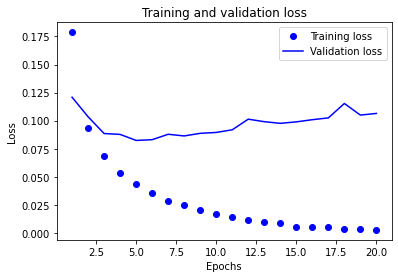

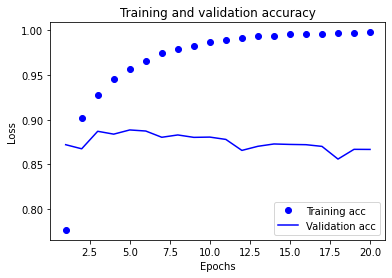

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.1857 - accuracy: 0.7424
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0837 - accuracy: 0.9071
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0585 - accuracy: 0.9346
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0889 - accuracy: 0.8795


array([[0.15402982],
       [0.9990884 ],
       [0.6611929 ],
       ...,
       [0.15061063],
       [0.07442501],
       [0.43076703]], dtype=float32)

In [ ]:
#Model 5 = MSE loss function

from keras import models
from keras import layers

model5 = models.Sequential()
model5.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))




model5.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

from keras import optimizers

model5.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mean_squared_error',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model5.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mean_squared_error,
              metrics=[metrics.binary_accuracy])


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()


import matplotlib.pyplot as plt

binary_accuracy = history.history['binary_accuracy']
val_binary_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(binary_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, binary_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_binary_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model5 = models.Sequential()
model5.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

model5.fit(x_train, y_train, epochs=4, batch_size=512)
results = model5.evaluate(x_test, y_test)

results

model5.predict(x_test)




Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.1895 - binary_accuracy: 0.7285 - val_loss: 0.1125 - val_binary_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0872 - binary_accuracy: 0.9040 - val_loss: 0.0867 - val_binary_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0550 - binary_accuracy: 0.9406 - val_loss: 0.0827 - val_binary_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0402 - binary_accuracy: 0.9559 - val_loss: 0.0916 - val_binary_accuracy: 0.8761
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0307 - binary_accuracy: 0.9663 - val_loss: 0.0868 - val_binary_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0266 - binary_accuracy: 0.9713 - val_loss: 0.0908 - val_binary_accuracy: 0.8804
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

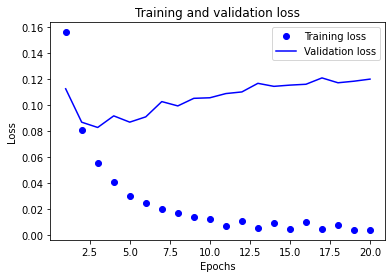

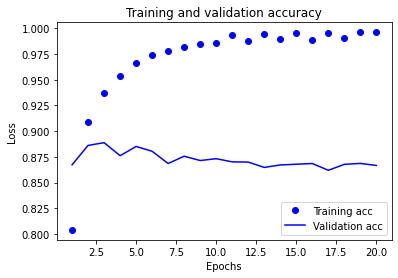

Epoch 1/4
49/49 [==============================] - 2s 36ms/step - loss: 0.5476 - accuracy: 0.7373
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2726 - accuracy: 0.9061
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2052 - accuracy: 0.9260
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3036 - accuracy: 0.8799


array([[0.15674892],
       [0.9996549 ],
       [0.7838067 ],
       ...,
       [0.09690309],
       [0.05887237],
       [0.37920633]], dtype=float32)

In [ ]:
#Model 6 = tanh

from keras import models
from keras import layers

model6 = models.Sequential()
model6.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model6.add(layers.Dense(16, activation='tanh'))
model6.add(layers.Dense(1, activation='sigmoid'))




model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers

model6.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model6.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mean_squared_error,
              metrics=[metrics.binary_accuracy])


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history6 = model6.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict6 = history6.history
history_dict6.keys()


import matplotlib.pyplot as plt

binary_accuracy = history6.history['binary_accuracy']
val_binary_accuracy = history6.history['val_binary_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1, len(binary_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, binary_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_binary_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model6 = models.Sequential()
model6.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(16, activation='relu'))
model6.add(layers.Dense(1, activation='sigmoid'))

model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model6.fit(x_train, y_train, epochs=4, batch_size=512)
results = model6.evaluate(x_test, y_test)

results

model6.predict(x_test)


